In [0]:
!pip install pyspark

    100% |████████████████████████████████| 213.4MB 88kB/s 
    100% |████████████████████████████████| 204kB 29.4MB/s 
  Stored in directory: /root/.cache/pip/wheels/cd/54/c2/abfcc942eddeaa7101228ebd6127a30dbdf903c72db4235b23
Successfully built pyspark


In [1]:
from pyspark import SparkContext
sc = SparkContext()
from pyspark.sql import SQLContext
sqlc = SQLContext(sc)

In [0]:
!apt-get install openjdk-8-jdk-headless -qq > /dev/null
!wget -q http://www-us.apache.org/dist/spark/spark-2.4.0/spark-2.4.0-bin-hadoop2.7.tgz
!tar xf spark-2.4.0-bin-hadoop2.7.tgz
!pip install -q findspark

In [1]:
from pyspark import SparkContext
sc = SparkContext()

In [2]:
from pyspark.sql import SQLContext
sqlc = SQLContext(sc)

Saving iris.csv to iris.csv


In [1]:
from pyspark import SparkContext
sc = SparkContext()

In [2]:
from pyspark.sql import SQLContext
sqlc = SQLContext(sc)

In [3]:
df = sqlc.read.format('com.databricks.spark.csv').options(header = 'true', inferschema = 'true'\
    ).load("file:///D:/Big-Data-Science/Big-Data-Analysis-with-Python-master/Lesson05/iris.csv")

In [4]:
df.show(5)

+------------+-----------+------------+-----------+-------+
|sepal_length|sepal_width|petal_length|petal_width|species|
+------------+-----------+------------+-----------+-------+
|         5.1|        3.5|         1.4|        0.2| setosa|
|         4.9|        3.0|         1.4|        0.2| setosa|
|         4.7|        3.2|         1.3|        0.2| setosa|
|         4.6|        3.1|         1.5|        0.2| setosa|
|         5.0|        3.6|         1.4|        0.2| setosa|
+------------+-----------+------------+-----------+-------+
only showing top 5 rows



In [5]:
from pyspark.sql import SparkSession

In [6]:
spark = SparkSession.builder.appName("Python Spark Session").getOrCreate()

In [7]:
df = spark.read.csv("file:///D:/Big-Data-Science/Big-Data-Analysis-with-Python-master/Lesson05/iris.csv", \
                    header = True)

In [8]:
df.show(5)

+------------+-----------+------------+-----------+-------+
|sepal_length|sepal_width|petal_length|petal_width|species|
+------------+-----------+------------+-----------+-------+
|         5.1|        3.5|         1.4|        0.2| setosa|
|         4.9|          3|         1.4|        0.2| setosa|
|         4.7|        3.2|         1.3|        0.2| setosa|
|         4.6|        3.1|         1.5|        0.2| setosa|
|           5|        3.6|         1.4|        0.2| setosa|
+------------+-----------+------------+-----------+-------+
only showing top 5 rows



Exercise 1

In [9]:
from pyspark.sql.functions import isnan, when, count, col
df.select([count(when(isnan(c) | col(c).isNull(),
                c)).alias(c) for c in df.columns]).show()

+------------+-----------+------------+-----------+-------+
|sepal_length|sepal_width|petal_length|petal_width|species|
+------------+-----------+------------+-----------+-------+
|           0|          0|           0|          0|      0|
+------------+-----------+------------+-----------+-------+



iris dataset does not have empty values by default. The dataset is a little different here


In [10]:
df.filter(col('sepal_length').isNull()).count()

0

Exercise 2

In [11]:
from pyspark.sql.functions import isnan, when, count, col

In [13]:
df = sqlc.read.format('com.databricks.spark.csv').options(header = 'true', inferschema = 'true').load( \
    'file:///D:/Big-Data-Science/Big-Data-Analysis-with-Python-master/Lesson05/iris1.csv')
df.select([count(when(isnan(i) | col(i).isNull(), i)).alias(i) for i in df.columns]).show()

+------------+-----------+------------+-----------+-------+
|sepal_length|sepal_width|petal_length|petal_width|species|
+------------+-----------+------------+-----------+-------+
|           2|          0|           1|          0|      0|
+------------+-----------+------------+-----------+-------+



In [15]:
df.describe().show(1)

+-------+------------+-----------+------------+-----------+-------+
|summary|sepal_length|sepal_width|petal_length|petal_width|species|
+-------+------------+-----------+------------+-----------+-------+
|  count|         148|        150|         149|        150|    150|
+-------+------------+-----------+------------+-----------+-------+
only showing top 1 row



In [17]:
df.where(col('sepal_length').isNull()).show() 

+------------+-----------+------------+-----------+----------+
|sepal_length|sepal_width|petal_length|petal_width|   species|
+------------+-----------+------------+-----------+----------+
|        null|        3.8|         1.5|        0.3|    setosa|
|        null|        2.7|         3.9|        1.4|versicolor|
+------------+-----------+------------+-----------+----------+



In [18]:
df.where(col('petal_length').isNull()).show()

+------------+-----------+------------+-----------+---------+
|sepal_length|sepal_width|petal_length|petal_width|  species|
+------------+-----------+------------+-----------+---------+
|         6.3|        2.8|        null|        1.5|virginica|
+------------+-----------+------------+-----------+---------+



In [19]:
df2 = sqlc.read.format('com.databricks.spark.csv').options(header = 'true', inferschema = 'true').load( \
    'file:///D:/Big-Data-Science/Big-Data-Analysis-with-Python-master/Lesson05/iris2.csv')
df2.select('sepal_length').dropna().count()

148

In [19]:
df2.dropna().count()

147

In [20]:
df2.describe().show(1)

+-------+------------+-----------+------------+-----------+-------+
|summary|sepal_length|sepal_width|petal_length|petal_width|species|
+-------+------------+-----------+------------+-----------+-------+
|  count|         148|        150|         149|        150|    150|
+-------+------------+-----------+------------+-----------+-------+
only showing top 1 row



Exercise 4

In [21]:
y = df2.select('sepal_length','petal_length').fillna(5.1)

In [22]:
y.select([count(when(isnan(i) | col(i).isNull(), i)).alias(i) for i in y.columns]).show()

+------------+------------+
|sepal_length|petal_length|
+------------+------------+
|           0|           0|
+------------+------------+



In [23]:
z = df2.fillna(5.1)

In [24]:
z.select([count(when(isnan(k) | col(k).isNull(), k)).alias(k) for k in z.columns]).show()

+------------+-----------+------------+-----------+-------+
|sepal_length|sepal_width|petal_length|petal_width|species|
+------------+-----------+------------+-----------+-------+
|           0|          0|           0|          0|      0|
+------------+-----------+------------+-----------+-------+



Exercise 5

In [5]:
df.corr('sepal_length', 'sepal_width')

-0.10936924995064931

In [6]:
from pyspark.mllib.stat import Statistics
import pandas as pd

In [7]:
z = df.fillna(5.1)

In [8]:
a = z.drop('species')

In [9]:
features = a.rdd.map(lambda row: row[0:])
correlation_matrix = Statistics.corr(features, method="pearson")

In [10]:
correlation_df = pd.DataFrame(correlation_matrix)

In [11]:
correlation_df.index, correlation_df.columns = a.columns, a.columns

In [12]:
correlation_df

,sepal_length,sepal_width,petal_length,petal_width
sepal_length,1.000000,-0.109369,0.871754,0.817954
sepal_width,-0.109369,1.000000,-0.420516,-0.356544
petal_length,0.871754,-0.420516,1.000000,0.962757
petal_width,0.817954,-0.356544,0.962757,1.000000


<AxesSubplot:>

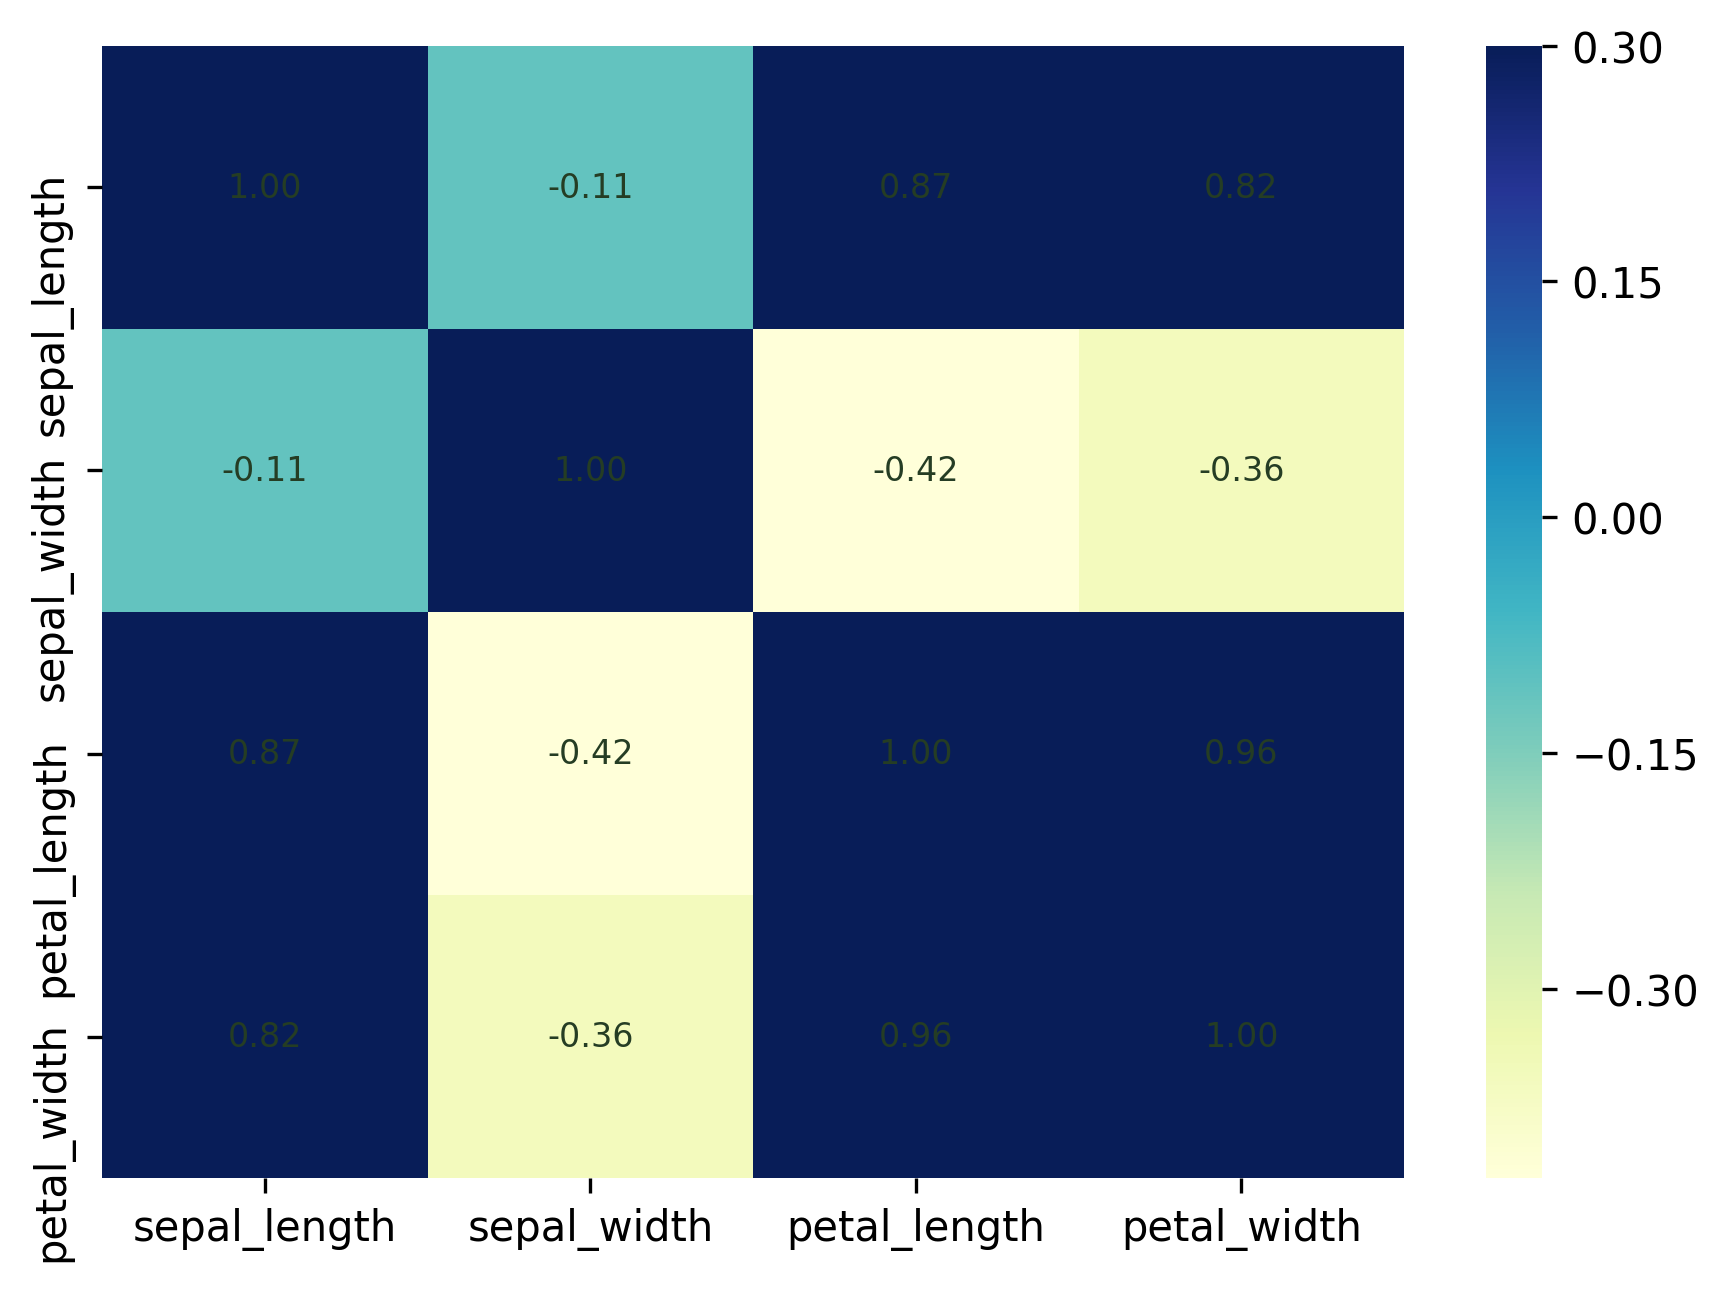

In [13]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
# import palettable
plt.figure(figsize=(7, 5),dpi=300)
sns.heatmap(data=correlation_df,
            vmax=0.3, 
            # cmap=palettable.cmocean.diverging.Curl_10.mpl_colors,
            cmap = "YlGnBu",
            annot=True,#图中数字文本显示
            fmt=".2f",#格式化输出图中数字，即保留小数位数等
            annot_kws={'size':8,'weight':'normal', 'color':'#253D24'},#数字属性设置，例如字号、磅值、颜色 
            # mask=np.triu(np.ones_like(correlation_df,dtype=np.bool))#显示对脚线下面部分图
           )